In [16]:
### AAI-530 - Final Project 
### Team-13 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
url = "https://data.mendeley.com/datasets/65jxyrxv7b/1"
print("Dataset available at:", url)

# Assuming dataset is downloaded as a CSV file
df = pd.read_csv("Crop_recommendationV2.csv")

# Display basic information
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

# Data Preprocessing
# Handling missing values
df = df.dropna()

# Selecting Features and Target
X = df[['temperature', 'humidity', 'ph', 'rainfall', 'soil_type', 'sunlight_exposure', 'wind_speed', 'co2_concentration', 'organic_matter', 'irrigation_frequency', 'crop_density', 'pest_pressure', 'fertilizer_usage', 'growth_stage', 'urban_area_proximity', 'water_source_type', 'frost_risk', 'water_usage_efficiency']]
y = df['soil_moisture']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Dictionary of models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}




Dataset available at: https://data.mendeley.com/datasets/65jxyrxv7b/1
Dataset Head:
    N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth

In [21]:
# Training and Evaluating Models
for name, model in models.items():
    print(f"\n{name}:")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = max(r2 * 100, 0)  # Avoid negative accuracy values
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")
    print(f"Model Accuracy: {accuracy:.2f}%")



Random Forest:
Mean Absolute Error (MAE): 5.090959139896636
Mean Squared Error (MSE): 34.84383073005198
Root Mean Squared Error (RMSE): 5.902866314770476
R-squared (R2) Score: -0.02879993370091327
Model Accuracy: 0.00%

Gradient Boosting:
Mean Absolute Error (MAE): 5.104774035320443
Mean Squared Error (MSE): 35.413850266398654
Root Mean Squared Error (RMSE): 5.950953727462402
R-squared (R2) Score: -0.045630346686931444
Model Accuracy: 0.00%

XGBoost:
Mean Absolute Error (MAE): 5.276373674951636
Mean Squared Error (MSE): 38.342820845990815
Root Mean Squared Error (RMSE): 6.192158012033512
R-squared (R2) Score: -0.13211121503466527
Model Accuracy: 0.00%

LightGBM:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3589
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 18
[LightGBM] [Info] Start training from sc

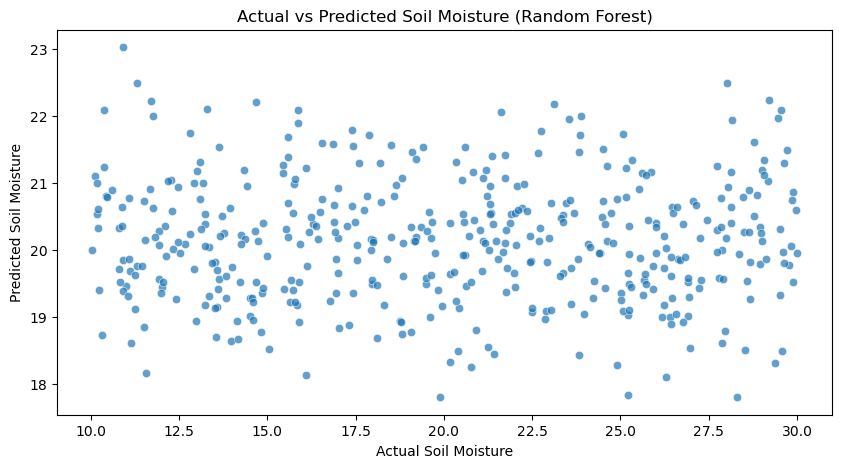

In [18]:

# Visualization (for Random Forest as an example)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=models["Random Forest"].predict(X_test_scaled), alpha=0.7)
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture (Random Forest)")
plt.show()


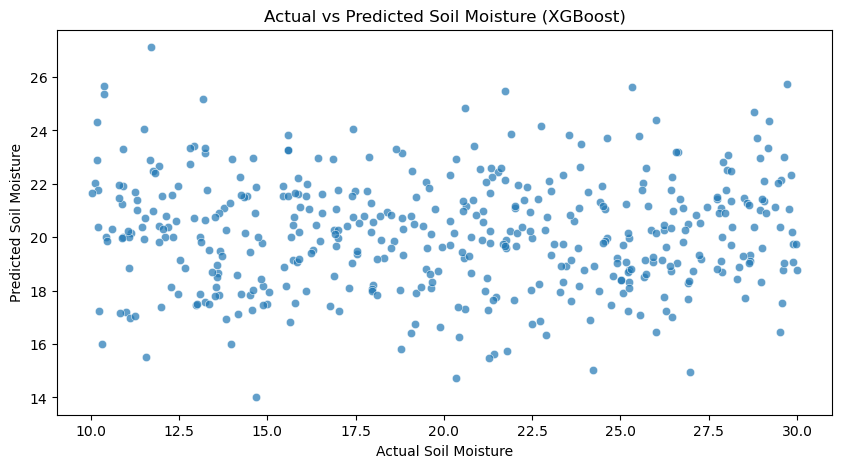

In [19]:

# Visualization (for XGBoost as an example)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=models["XGBoost"].predict(X_test_scaled), alpha=0.7)
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs Predicted Soil Moisture (XGBoost)")
plt.show()
